<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.3: Measurements

In [2]:
## Import Libraries

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 1. Forward Feature Selection

> Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2  and  AdjustedR2  in this case).

#### 1.1 Load Diabetics Data Using datasets of sklearn

In [11]:
## Load the Diabetes Housing dataset

# Load the diabetes dataset from sklearn
diabetes = datasets.load_diabetes()

In [12]:
# Description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [13]:
# Predictors
X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

In [14]:
# Target
y = diabetes.target

In [15]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### 1.2 Use Forward Feature Selection to pick a good model

**Hint: Same as Lab 4.2.2**

- Add R^2 value in a list
- Add Adjusted R^2 in another list
- Display both R^2 and Adjusted R^2

In [16]:
## Flag intermediate output

show_steps = False   # for testing/debugging
# show_steps = False  # without showing steps

In [28]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]

r2_list_comprehensive = []
adjusted_r2_list_comprehensive = []

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    if show_steps:
        print('')
    
    excluded = list(set(X.columns) - set(included))

    if show_steps:
        print('(Step) Excluded = %s' % ','.join(excluded))
    
    for new_column in excluded:
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ','.join(included + [new_column]))
    
        fit = model.fit(X_train[included + [new_column]], y_train)
        
        r2 = model.score(X_train[included + [new_column]], y_train)
        k = len(included) + 1
        dof = n-k-1
        adjusted_r2 = 1 - (1 - r2) * (n - 1) / dof
        
        r2_list_comprehensive.append(r2)
        adjusted_r2_list_comprehensive.append(adjusted_r2)
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))
        
        if adjusted_r2 > best['a_r2']:
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
        

    if changed:
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
        r2_list.append(r2)
        adjusted_r2_list.append(adjusted_r2)
    else:
        break



Added feature bmi  with R^2 = 0.366 and adjusted R^2 = 0.364
Added feature s5   with R^2 = 0.458 and adjusted R^2 = 0.455
Added feature bp   with R^2 = 0.483 and adjusted R^2 = 0.479
Added feature s1   with R^2 = 0.499 and adjusted R^2 = 0.493
Added feature s2   with R^2 = 0.509 and adjusted R^2 = 0.502
Added feature sex  with R^2 = 0.523 and adjusted R^2 = 0.515
Added feature s4   with R^2 = 0.526 and adjusted R^2 = 0.516


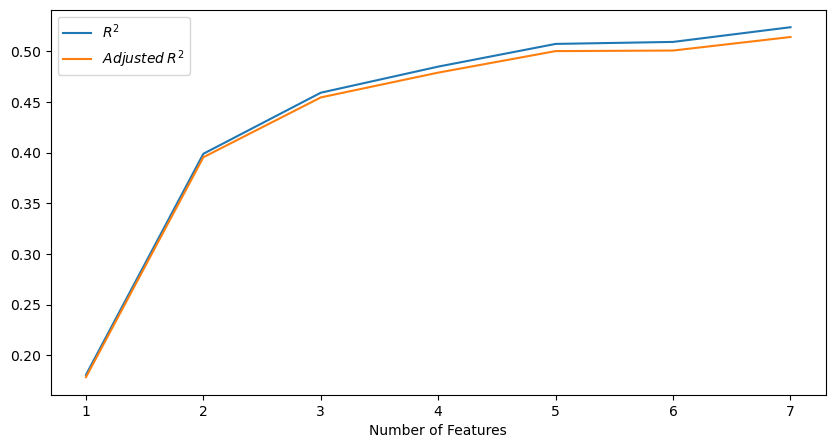

In [24]:
## Chart both R^2 and Adjusted R^2

_range = range(1, len(r2_list)+1)

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric 
plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
# add some better visualisation
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()

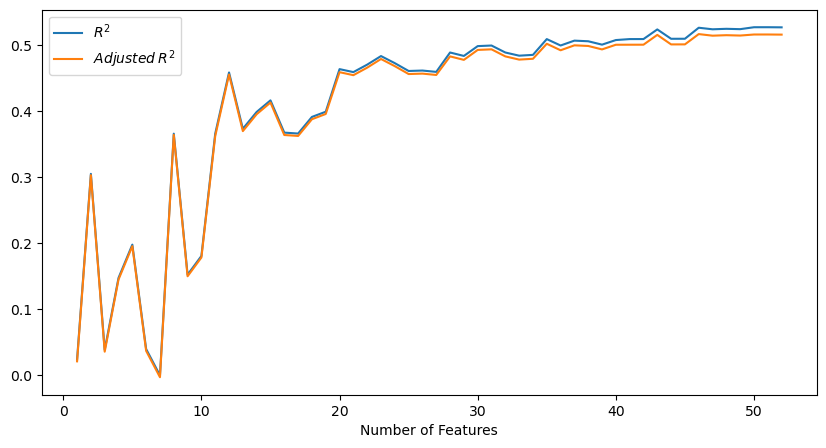

In [29]:
## Chart both R^2 and Adjusted R^2 at every iteration of the for loop

_range = range(1, len(r2_list_comprehensive)+1)

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric 
plt.plot(_range, r2_list_comprehensive, label = '$R^2$')
plt.plot(_range, adjusted_r2_list_comprehensive, label = '$Adjusted \: R^2$')
# add some better visualisation
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



